# Predicting DIA's Price

The Dow Jones Industrial Average (DJIA), is a price weighted index of 30 large-cap stocks in the United States. Dow Jones Industrial Average (DJIA) is one of the most followed stock market indexes in the world. Forecasting stock prices is a very hard task, but has potential for big financial rewards. Using ML algorithms might, we might be able to predict the movements of the Dow Jones Industrial Average (DJIA). Investors of all sizes will be interested in the potential of making great returns. The strategies that are found might be able to be tested on other indexes such as the Standard and Poor’s (S&P 500), Russell 2000, NASDAQ Composite (NASDAQ). We will be using the SPDR Dow Jones Industrial Average Trust EFT (DIA) for this project to try and predict the ETF's price. The SPDR Dow Jones Industrial Average Trust EFT (DIA) is a ETF that correspond generally to the price and yield performance of the Dow Jones Industrial Average. 

## 1. Data 

We collected the data from Yahoo! Finance. Yahoo! Finance is a media property that is part of the Yahoo! network. Yahoo! Finance provides financial news, data, and various other products. The link below will lead to the data that was used for part of this project. We used the DIA's stock price from the beginning 2015 to the end of 2019. The reason for picking the 5-year time frame was because if we used all of the data since the beginning, some of the code would take too long to run. Having the 5-year time frame allows the code to run in a reasonable time. The data we used has 7 columns and 1257 rows.

* [DIA Historical Data](https://finance.yahoo.com/quote/DIA/history?period1=1420070400&period2=1577750400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

## 2. Data Wrangling

As mentioned before, the data we used has 7 columns and 1257 rows. The columns being 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'. We set the 'Date' column to a datetime object and set as the index. The stock market is open for trading only on normal business days, so we set the frequency of our data to business days. This lead our data to having missing values because of the holidays, we fix this by filling the missing values with the previous days value. The reasoning behind this is because the price of the ETF should be the same the previous days value because there should not be any trading going on since the previous day. We are only interested with working with the 'Adj Close' for this project, so we drop all of other columns beside 'Adj Close'. We will be only working with univariate time series for project. A multivariate time series project is maybe for a future project.

## 3. EDA

Since we are only working with 'Adj Close', it is important that we look at 'Adj Close' closely. The line plot shows the increase or decrease in price over time. The histogram shows the distribution of the different prices. The kernel density estimate plot shows the probability density at different prices.

The 'Adj Close' graph shows that the price of DIA has gone up over the years from around 150 to around 270. The 'Adj Closing Histogram' and 'Adj Closing KDE' shows the distribution of the prices over the 5-year period. It shows that in the 5-year period, the DIA around 160 and around 240 the most frequently.

Adj Close | Adj Closing Histogram | Adj Closing KDE
:-: | :-: | :-:
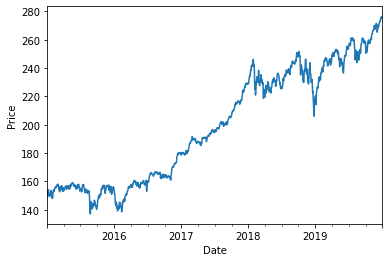 | 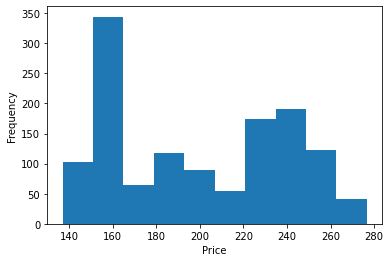 | 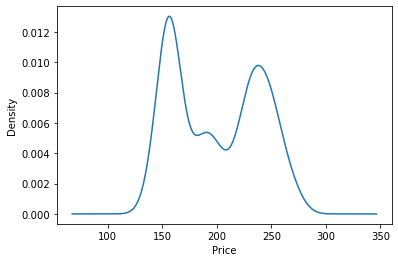

The graphs below are there to show the percentage change in daily price. It is worth noting that most of the percentage change is within 1% and that anything over 2% occurs less.

Adj Close % Change | Adj Closing Histogram % Change |
:-: | :-: |
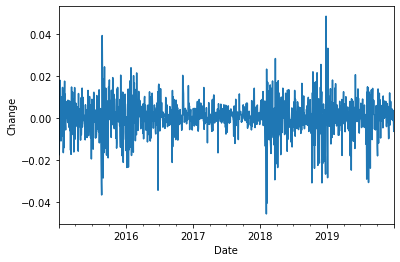| 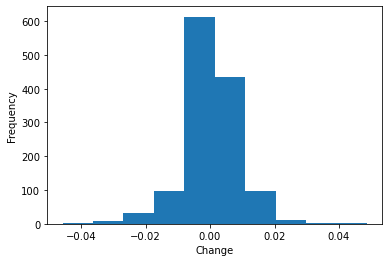 |

## 4.  Preprocessing and Modeling

### 4.a Train-Test split

It is important to split our data to training data and testing data for machine learning model. We split our data 65% training data and 45% testing data. The percentages were chosen arbitrary.  

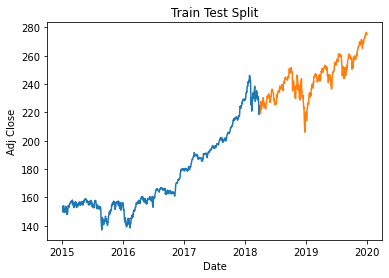

We will be using MSE to see which model. MSE (Mean Squared Error) measures the average of the squares of the error. Lower the MSE the better the model fits better. We used MSE because it is one of the measures that is used when using time series data. The advantages of MSE is that it provides a quadratic loss function meaning that it is great for ensuring that our model does not have huge outliers because MSE punishes outlier more heavily.

We will be using the different ARIMA models and the LSTM model to try to predict the future DIA's price. 

### 4.b ARIMA

ARIMA (Autoregressive Integrated Moving Average) model is used alot with time series data. It combines the AR (Autoregressive) model and the MA (Moving Average) model. ARIMA (1, 0, 0) model is the same as the AR (1) model and ARIMA (0, 0, 1) is the same as the MA (1). The I in the ARIMA model means integrated, which has to do with differencing because in order to use the ARIMA model the data should be stationary. People can read more on the ARIMA model in the link below.
* https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average

### 4.bi Decomposition

Decomposition on time series is used to look for trends and pattern in our data. It means breaking that data into 3 components:
* Trend: The overall direction that the data is travelling in (like upwards or downwards)
* Seasonality: Cyclical patterns in the data
* Noise: The random variation in the data

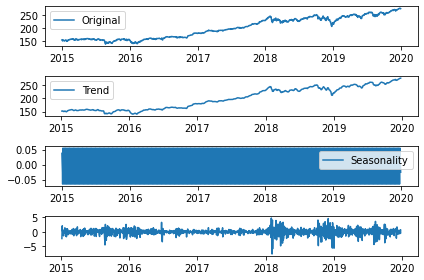

We can see how to treat our data by looking at these graphs. It looks like taking log and differencing it will help us with our model.

### 4.bii Stationarity

In order to use the ARIMA model the data needs to be stationary. We use Dicky-Fuller test to test of stationarity. People can read more on stationarity in the link below.
* https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test

We need to transform our data in a way so that our data become stationary. After transforming that data and running the Dicky-Fuller test, we found that taking the log difference passed the Dicky-Fuller test and we can conclude that the log difference of DIA's price is stationary. Which can be seen in the graph below.

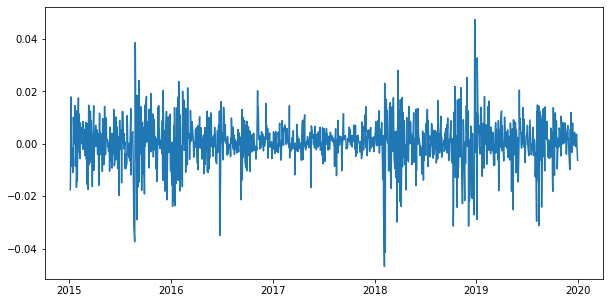

### 4.biii ARIMA model

To choose the best ARIMA model, we need to pick the p, d, q in ARIMA (p, d, q) that results in the lowest MSE. In order to do this we test different ARIMA models. Luckily, we have function that will test the ARIMA models and choose the one with the lowest MSE. We are the data through a function that allow just to test different values p, d, q to find the best ARIMA model. 

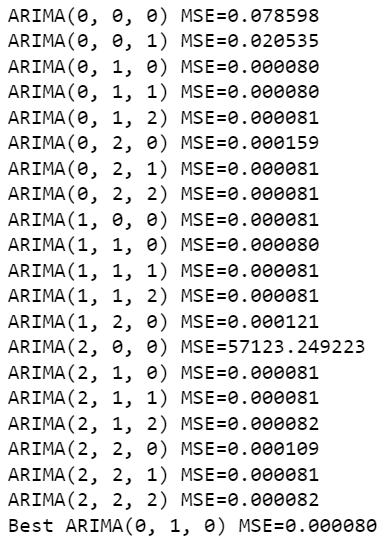

The models that we are curious about is the AR(1), ARIMA(0, 1, 0), MA(1). AR(1) has the MSE OF .000081, ARIMA (0, 1, 0) has a MSE of .000080, MA(1) has a MSE of 0.020535. AR(1) is an autoregressive model which the current value is based off of one price before. MA(1) model is the first order moving average model.

### 4.bvi Best ARIMA model

The best ARIMA model according to MSE is the ARIMA (0, 1, 0) which is something called a random walk.We also testing other ARIMA related models, for examples AR(1) and MA(1) models, but all of the other models had higher MSE.

### 4.bv Prediction

ARIMA (0, 1, 0) is a random walk. Random walk means the movements are due to chance. The graphs below are there just for visualization and should not be taken seriously.

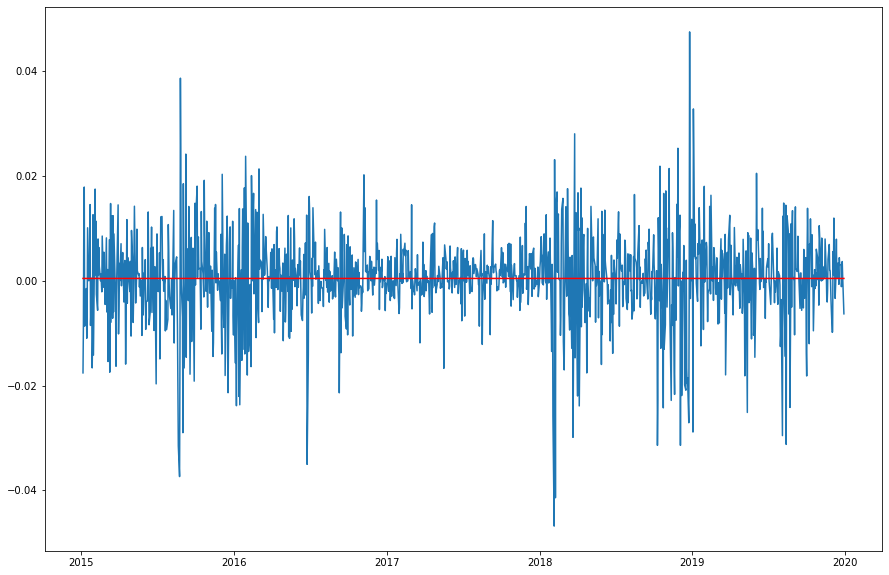

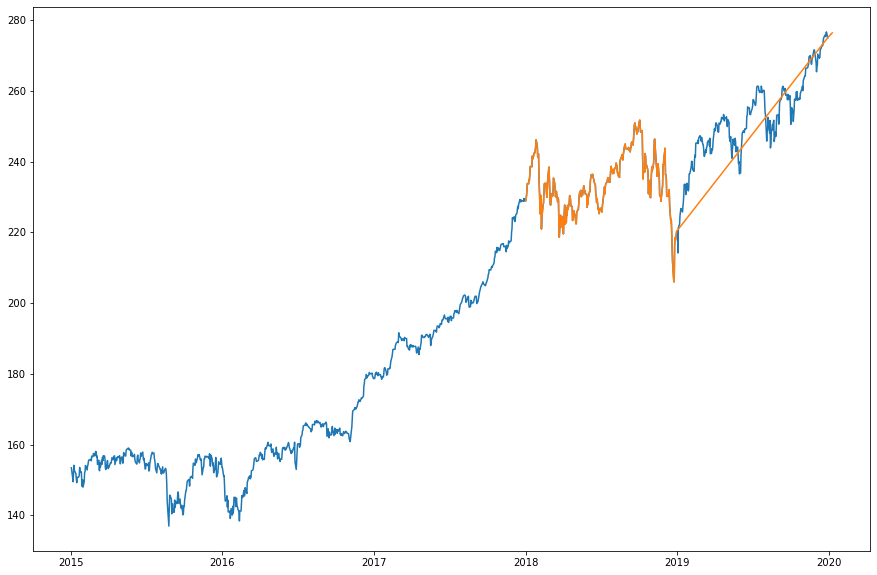

### 4.c LSTM

LSTM (Long Short-Term Memory) model is an artificial recurrent neural network architecture used in the field of deep learning. People can read more on the LSTM model in the link below.
* https://en.wikipedia.org/wiki/Long_short-term_memory

Artificial recurrent neural network (RNN) has been gaining more popularity as technology advanced. LSTM was one of the RNN that was invented in 1997 by Hochreiter and Schmidhuber and it set accuracy records in multiple domains.

### 4.ci Scaling

It is important to scale the data when working with the LSTM model. If the data is not scaled, it can cause a problem with the model and makes it so that the model will not be able to learn properly. For this project, we used the MinMaxScaler form sklearn.preprocessing to scaled the data.

### 4. cii LSTM model

We ran our training data through the simple LSTM model that we have created with 100 epochs and a batch size of 64.

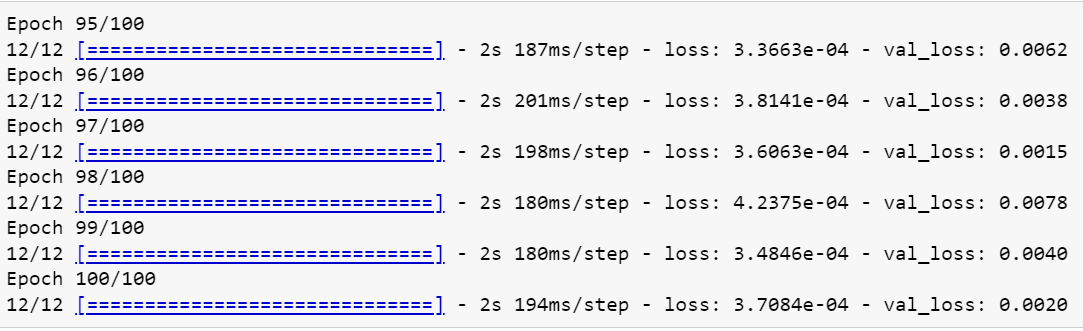

### 4. ciii Model Prediction

We then calculate the MSE our model in which we get 59898 for our MSE for our test data and the prediction. Plotting it, we get a graph that looks like:

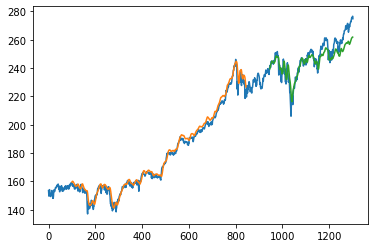

As you can tell from the graph that the model did pretty good at predicting the earlier test data, but started to deviated as time went on. This is probably due the the fact the DIA's price is a random walk. This mean that the price is random and is very hard to predict. We will used the prediction of our model to predict the prices for future dates, the predict prices looks like. 

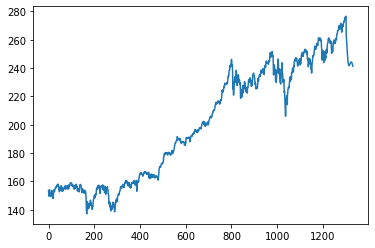

It is important to note that this graph was for curiosity only on what the prediction would look like and should not be used for any financial decisions.

## 5.  Conclusion

We used both the ARIMA model and LSTM model to try to predict future stock price of DIA (SPDR Dow Jones Industrial Average ETF Trust). A lot of people wants to be able to predict the stock prices, but stock prices are very hard/almost impossible to predict. ARIMA model is better short term forecasting, while LSTM is better for long term modeling. We tested AR(1), ARIMA(0, 1, 0) and MA(1) and found out that ARIMA(0, 1, 0) had the lowest MSE of .000080.
Making better models for DIA are beyond the scope of this capstone and require more knowledge and skills which I would acquire as time goes on. For businesses, picking ARIMA vs LSTM is cost vs benefit. LSTM gives better prediction result, but at the cost of more complexity. The best ARIMA model we got for DIA is ARIMA (0, 1, 0) meaning that DIA is a random walk. This goes in line with the Random Walk theory and the Efficient Market Hypothesis. The LSTM model was able to predict the general trend of which way DIA was going, but I would say the LSTM model we used for this project is unreliable and should not be used to decide when to pick and sell stocks. There maybe a better model out there that might be able to predict the prices of DIA, but that is beyond the scope of this project. For now, I would choose ARIMA (0, 1, 0) and say that DIA's price is a random walk.

Here are links to Random Walk and the Efficient Market Hypothesis
* [Random Walk](https://en.wikipedia.org/wiki/Random_walk)
* [Efficient Market Hypothesis](https://en.wikipedia.org/wiki/Efficient-market_hypothesis)

### 6. Final Thoughts

This project is a capstone with the aim to teach myself the skills needed for a data science project. I gain more confidence in data science and model building as I complete this project. There maybe more better models out there that might be able to predict DIA's unpredictablility, but as of right now, we can concluded that DIA's price is a random walk and cannot be reasonability predicted consistantly. There is big money to be made by predicting stock prices and I hope that everyone gives tryign to predict the DIA's price a try. If someone out there creates a model that can predict stock prices, there is big money to be made.